In [1]:
install.packages('tidyverse')
install.packages('lubridate')
install.packages('gganimate')
install.packages('geomtextpath')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)
library(lubridate)
library(gganimate)
library(IRdisplay)
library(base64enc)
library(geomtextpath)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
wmundfriendlies <- read.csv2("https://raw.githubusercontent.com/denisnaumov0506/FootballAnalyticsProject/master/data/world_cup%26friendlies_football_en.csv", header = TRUE, sep = ";")
wmundfriendlies

country   fifa_date  Matchday       Time     Venue Opponent           
1    Argentina 2009-12-16 NA             2:00 AM  H     Costa Rica         
2    Argentina 2010-02-03 NA             2:00 AM  H     Jamaica            
3    Argentina 2010-03-03 NA             8:45 PM  A     Germany            
4    Argentina 2010-04-28 NA             11:00 PM H     Haiti              
5    Argentina 2010-04-28 NA             9:00 PM  H     Canada             
6    Argentina 2010-05-26 Group B        4:00 PM  N     Nigeria            
7    Argentina 2010-05-26 Group B        1:30 PM  N     South Korea        
8    Argentina 2010-05-26 Group B        8:30 PM  N     Greece             
9    Argentina 2010-05-26 Round of 16    8:30 PM  N     Mexico             
10   Argentina 2010-05-26 Quarter-Finals 4:00 PM  N     Germany            
11   Argentina 2010-08-11 NA             8:45 PM  A     Republic of Ireland
12   Argentina 2010-08-11 NA             10:00 PM H     Spain              
13   Argentina 2010-09-24 NA             12:50 PM A     Japan              
14   Argentina 2010-11-17 NA             6:00 PM  H     Brazil             
15   Argentina 2011-02-02 NA             9:00 PM  A     Portugal           
16   Argentina 2011-03-09 NA             12:00 AM H     Venezuela          
17   Argentina 2011-03-09 NA             12:10 AM A     United States      
18   Argentina 2011-03-09 NA             3:00 AM  A     Costa Rica         
19   Argentina 2011-04-13 NA             1:00 AM  H     Ecuador            
20   Argentina 2011-05-18 NA             9:00 PM  H     Paraguay           
21   Argentina 2011-05-18 NA             8:00 PM  A     Nigeria            
22   Argentina 2011-05-18 NA             5:00 PM  A     Poland             
23   Argentina 2011-05-18 NA             8:00 PM  H     Albania            
24   Argentina 2011-08-24 NA             3:30 PM  A     Venezuela          
25   Argentina 2011-08-24 NA             3:00 PM  H     Nigeria            
26   Argentina 2011-08-24 NA             2:50 AM  H     Brazil             
27   Argentina 2011-09-21 NA             2:50 AM  A     Brazil             
28   Argentina 2012-02-15 NA             8:30 PM  A     Switzerland        
29   Argentina 2012-06-06 NA             3:00 PM  H     Brazil             
30   Argentina 2012-08-08 NA             8:45 PM  A     Germany            
⋮    ⋮         ⋮          ⋮              ⋮        ⋮     ⋮                  
2370 Wales     2012-05-09 NA             9:05 PM  A     Mexico             
2371 Wales     2012-08-08 NA             8:45 PM  H     Bosnia-Herzegovina 
2372 Wales     2013-01-17 NA             8:45 PM  H     Austria            
2373 Wales     2013-08-08 NA             8:45 PM  H     Republic of Ireland
2374 Wales     2013-10-17 NA             7:00 PM  H     Finland            
2375 Wales     2014-02-13 NA             8:45 PM  H     Iceland            
2376 Wales     2014-05-08 NA             8:30 PM  A     Netherlands        
2377 Wales     2015-11-05 NA             8:45 PM  H     Netherlands        
2378 Wales     2016-03-03 NA             8:45 PM  H     Northern Ireland   
2379 Wales     2016-03-03 NA             8:00 PM  A     Ukraine            
2380 Wales     2016-06-02 NA             4:00 PM  A     Sweden             
2381 Wales     2017-10-16 NA             9:00 PM  A     France             
2382 Wales     2017-10-16 NA             8:45 PM  H     Panama             
2383 Wales     2018-03-15 NA             12:35 PM A     China              
2384 Wales     2018-03-15 NA             1:35 PM  H     Uruguay            
2385 Wales     2018-05-17 NA             3:00 AM  A     Mexico             
2386 Wales     2018-09-20 NA             8:45 PM  H     Spain              
2387 Wales     2018-10-25 NA             8:00 PM  A     Albania            
2388 Wales     2019-02-08 NA             8:45 PM  H     Trinidad and Tobago
2389 Wales     2019-07-25 NA             8:45 PM  H     Belarus            
2390 Wales     2020-09-17 NA             9:00 PM  A  

In [4]:
mutate(wmundfriendlies, 
    home_team = ifelse(Venue == 'H', wmundfriendlies$country, wmundfriendlies$Opponent)) -> wmfr1
mutate(wmfr1, 
    away_team = ifelse(Venue == 'A', wmundfriendlies$country, wmundfriendlies$Opponent)) -> wmfr2

wmfr2

country   fifa_date  Matchday       Time     Venue Opponent           
1    Argentina 2009-12-16 NA             2:00 AM  H     Costa Rica         
2    Argentina 2010-02-03 NA             2:00 AM  H     Jamaica            
3    Argentina 2010-03-03 NA             8:45 PM  A     Germany            
4    Argentina 2010-04-28 NA             11:00 PM H     Haiti              
5    Argentina 2010-04-28 NA             9:00 PM  H     Canada             
6    Argentina 2010-05-26 Group B        4:00 PM  N     Nigeria            
7    Argentina 2010-05-26 Group B        1:30 PM  N     South Korea        
8    Argentina 2010-05-26 Group B        8:30 PM  N     Greece             
9    Argentina 2010-05-26 Round of 16    8:30 PM  N     Mexico             
10   Argentina 2010-05-26 Quarter-Finals 4:00 PM  N     Germany            
11   Argentina 2010-08-11 NA             8:45 PM  A     Republic of Ireland
12   Argentina 2010-08-11 NA             10:00 PM H     Spain              
13   Argentina 2010-09-24 NA             12:50 PM A     Japan              
14   Argentina 2010-11-17 NA             6:00 PM  H     Brazil             
15   Argentina 2011-02-02 NA             9:00 PM  A     Portugal           
16   Argentina 2011-03-09 NA             12:00 AM H     Venezuela          
17   Argentina 2011-03-09 NA             12:10 AM A     United States      
18   Argentina 2011-03-09 NA             3:00 AM  A     Costa Rica         
19   Argentina 2011-04-13 NA             1:00 AM  H     Ecuador            
20   Argentina 2011-05-18 NA             9:00 PM  H     Paraguay           
21   Argentina 2011-05-18 NA             8:00 PM  A     Nigeria            
22   Argentina 2011-05-18 NA             5:00 PM  A     Poland             
23   Argentina 2011-05-18 NA             8:00 PM  H     Albania            
24   Argentina 2011-08-24 NA             3:30 PM  A     Venezuela          
25   Argentina 2011-08-24 NA             3:00 PM  H     Nigeria            
26   Argentina 2011-08-24 NA             2:50 AM  H     Brazil             
27   Argentina 2011-09-21 NA             2:50 AM  A     Brazil             
28   Argentina 2012-02-15 NA             8:30 PM  A     Switzerland        
29   Argentina 2012-06-06 NA             3:00 PM  H     Brazil             
30   Argentina 2012-08-08 NA             8:45 PM  A     Germany            
⋮    ⋮         ⋮          ⋮              ⋮        ⋮     ⋮                  
2370 Wales     2012-05-09 NA             9:05 PM  A     Mexico             
2371 Wales     2012-08-08 NA             8:45 PM  H     Bosnia-Herzegovina 
2372 Wales     2013-01-17 NA             8:45 PM  H     Austria            
2373 Wales     2013-08-08 NA             8:45 PM  H     Republic of Ireland
2374 Wales     2013-10-17 NA             7:00 PM  H     Finland            
2375 Wales     2014-02-13 NA             8:45 PM  H     Iceland            
2376 Wales     2014-05-08 NA             8:30 PM  A     Netherlands        
2377 Wales     2015-11-05 NA             8:45 PM  H     Netherlands        
2378 Wales     2016-03-03 NA             8:45 PM  H     Northern Ireland   
2379 Wales     2016-03-03 NA             8:00 PM  A     Ukraine            
2380 Wales     2016-06-02 NA             4:00 PM  A     Sweden             
2381 Wales     2017-10-16 NA             9:00 PM  A     France             
2382 Wales     2017-10-16 NA             8:45 PM  H     Panama             
2383 Wales     2018-03-15 NA             12:35 PM A     China              
2384 Wales     2018-03-15 NA             1:35 PM  H     Uruguay            
2385 Wales     2018-05-17 NA             3:00 AM  A     Mexico             
2386 Wales     2018-09-20 NA             8:45 PM  H     Spain              
2387 Wales     2018-10-25 NA             8:00 PM  A     Albania            
2388 Wales     2019-02-08 NA             8:45 PM  H     Trinidad and Tobago
2389 Wales     2019-07-25 NA             8:45 PM  H     Belarus            
2390 Wales     2020-09-17 NA             9:00 PM  A  

In [5]:
wmfr2 %>%
    arrange(date_of_play) -> wmfr3
wmfr3 %>%
    select(c('result_left', 'result_right', 'country', 'home_team', 'away_team', 'date_of_play')) -> wm_df
wm_df$result_left %>% as.numeric() -> wm_df$result_left
wm_df$result_right %>% as.numeric() -> wm_df$result_right
wm_df

result_left result_right country       home_team         
1    0           1            Iran          North Korea       
2    0           0            Qatar         Qatar             
3    0           0            Ghana         Ghana             
4    1           3            Cameroon      Kenya             
5    4           2            South Korea   Zambia            
6    1           2            Tunisia       Tunisia           
7    1           3            Denmark       Poland            
8    1           3            Poland        Poland            
9    0           2            South Korea   Finland           
10   1           3            Poland        Thailand          
11   1           0            South Korea   South Korea       
12   6           1            Poland        Poland            
13   1           3            United States United States     
14   3           2            Argentina     Argentina         
15   3           2            Costa Rica    Argentina         
16   1           0            Canada        Jamaica           
17   0           0            Japan         Japan             
18   2           1            Argentina     Argentina         
19   2           1            United States United States     
20   5           0            Mexico        Mexico            
21   2           0            Brazil        Brazil            
22   0           1            Argentina     Germany           
23   0           1            Belgium       Belgium           
24   0           0            Cameroon      Italy             
25   0           1            Croatia       Belgium           
26   2           1            Denmark       Austria           
27   3           1            England       England           
28   0           2            France        France            
29   0           1            Germany       Germany           
30   2           1            Ghana         Bosnia-Herzegovina
⋮    ⋮           ⋮            ⋮             ⋮                 
2370 NA          NA           Iran          United States     
2371 NA          NA           Netherlands   Netherlands       
2372 NA          NA           Qatar         Netherlands       
2373 NA          NA           Senegal       Ecuador           
2374 NA          NA           United States Iran              
2375 NA          NA           Wales         England           
2376 NA          NA           Argentina     Poland            
2377 NA          NA           Australia     Denmark           
2378 NA          NA           Denmark       Australia         
2379 NA          NA           France        Tunisia           
2380 NA          NA           Mexico        Saudi Arabia      
2381 NA          NA           Poland        Argentina         
2382 NA          NA           Saudi Arabia  Mexico            
2383 NA          NA           Tunisia       France            
2384 NA          NA           Belgium       Croatia           
2385 NA          NA           Canada        Morocco           
2386 NA          NA           Costa Rica    Germany           
2387 NA          NA           Croatia       Belgium           
2388 NA          NA           Germany       Costa Rica        
2389 NA          NA           Japan         Spain             
2390 NA          NA           Morocco       Canada            
2391 NA          NA           Spain         Japan             
2392 NA          NA           Brazil        Cameroon          
2393 NA          NA           Cameroon      Brazil            
2394 NA          NA           Ghana         Uruguay           
2395 NA          NA           Portugal      South Korea       
2396 NA          NA           Serbia        Switzerland       
2397 NA          NA           South Korea   Portugal          
2398 NA          NA           Switzerland   Serbia            
2399 NA          NA           Uruguay       Ghana             
     away_team           date_of_play
1    Iran                2010-01-02  
2    Mali              

In [6]:
#compare scores from home and away teams
  wm_df %>%
    mutate(Status = result_left - result_right) -> new_football_df_1

#get finalresults of the games, focused on home teams
  mutate(new_football_df_1, 
         HomeFinalStatus = ifelse(Status > 0, "Win", ifelse(Status < 0, "Lose", "Draw"))) -> new_football_df_2
  
  mutate(new_football_df_2, 
         AwayFinalStatus = ifelse(Status > 0, "Lose", ifelse(Status < 0, "Win", "Draw"))) -> new_football_df_2

#confirm if home team is country or not
  mutate(new_football_df_2, 
         HomeCountry = ifelse(country == home_team, "TRUE", "FALSE")) -> new_football_df_3

#confirm FinalResults accroding to finalstatus and homecountry
  mutate(new_football_df_3, 
         FinalResult = ifelse(HomeCountry == "TRUE", HomeFinalStatus, AwayFinalStatus)) -> new_football_df_4

#reduce redundant colomns
  new_football_df_4 %>%
    select(-Status, -HomeFinalStatus, -AwayFinalStatus, -HomeCountry) -> new_football_df_5

new_football_df_5 %>%
    filter(!is.na(FinalResult)) -> new_football_df_6

new_football_df_6

result_left result_right country       home_team         
1    0           1            Iran          North Korea       
2    0           0            Qatar         Qatar             
3    0           0            Ghana         Ghana             
4    1           3            Cameroon      Kenya             
5    4           2            South Korea   Zambia            
6    1           2            Tunisia       Tunisia           
7    1           3            Denmark       Poland            
8    1           3            Poland        Poland            
9    0           2            South Korea   Finland           
10   1           3            Poland        Thailand          
11   1           0            South Korea   South Korea       
12   6           1            Poland        Poland            
13   1           3            United States United States     
14   3           2            Argentina     Argentina         
15   3           2            Costa Rica    Argentina         
16   1           0            Canada        Jamaica           
17   0           0            Japan         Japan             
18   2           1            Argentina     Argentina         
19   2           1            United States United States     
20   5           0            Mexico        Mexico            
21   2           0            Brazil        Brazil            
22   0           1            Argentina     Germany           
23   0           1            Belgium       Belgium           
24   0           0            Cameroon      Italy             
25   0           1            Croatia       Belgium           
26   2           1            Denmark       Austria           
27   3           1            England       England           
28   0           2            France        France            
29   0           1            Germany       Germany           
30   2           1            Ghana         Bosnia-Herzegovina
⋮    ⋮           ⋮            ⋮             ⋮                 
2218 4           1            Japan         Japan             
2219 3           0            Morocco       United States     
2220 1           5            South Korea   South Korea       
2221 3           0            United States United States     
2222 1           0            Ecuador       Ecuador           
2223 0           3            Mexico        Mexico            
2224 0           3            Uruguay       Mexico            
2225 5           0            Argentina     Argentina         
2226 0           1            Saudi Arabia  Saudi Arabia      
2227 0           0            United States United States     
2228 0           0            Uruguay       United States     
2229 0           1            Brazil        Japan             
2230 0           0            Ecuador       Mexico            
2231 0           1            Japan         Japan             
2232 0           0            Mexico        Mexico            
2233 2           0            South Korea   South Korea       
2234 0           1            Saudi Arabia  Saudi Arabia      
2235 4           1            Ghana         Japan             
2236 4           1            Japan         Japan             
2237 2           2            South Korea   South Korea       
2238 0           2            Tunisia       Chile             
2239 5           0            Uruguay       Uruguay           
2240 1           0            Ecuador       Ecuador           
2241 1           2            Iran          Iran              
2242 1           3            Ghana         Chile             
2243 0           3            Japan         Japan             
2244 4           1            South Korea   South Korea       
2245 0           3            Tunisia       Japan             
2246 1           1            Qatar         Qatar             
2247 0           1            Mexico        Mexico            
     away_team           date_of_play FinalResult
1    Iran                2010-01-02   Win        

In [8]:
new_football_df_6 %>%
  filter(FinalResult == 'Win') -> result_wins

result_wins %>%
  separate(date_of_play, c('Year', 'Month', 'Day')) -> result_wins

result_wins$Year <- as.numeric(result_wins$Year)

result_wins

result_left result_right country       home_team     away_team          
1    0           1            Iran          North Korea   Iran               
2    1           3            Cameroon      Kenya         Cameroon           
3    1           3            Denmark       Poland        Denmark            
4    0           2            South Korea   Finland       South Korea        
5    1           3            Poland        Thailand      Poland             
6    1           0            South Korea   South Korea   Latvia             
7    6           1            Poland        Poland        Singapore          
8    3           2            Argentina     Argentina     Costa Rica         
9    2           1            Argentina     Argentina     Jamaica            
10   2           1            United States United States El Salvador        
11   5           0            Mexico        Mexico        Bolivia            
12   2           0            Brazil        Brazil        Republic of Ireland
13   0           1            Argentina     Germany       Argentina          
14   0           1            Croatia       Belgium       Croatia            
15   3           1            England       England       Egypt              
16   2           1            Netherlands   Netherlands   United States      
17   2           0            Poland        Poland        Bulgaria           
18   2           0            Portugal      Portugal      China              
19   0           2            Senegal       Greece        Senegal            
20   0           3            Serbia        Algeria       Serbia             
21   0           2            South Korea   Ivory Coast   South Korea        
22   0           2            Spain         France        Spain              
23   1           3            Uruguay       Switzerland   Uruguay            
24   2           0            Mexico        Mexico        New Zealand        
25   2           1            Mexico        Mexico        North Korea        
26   0           3            Serbia        Japan         Serbia             
27   4           0            Argentina     Argentina     Haiti              
28   1           0            Mexico        Mexico        Senegal            
29   3           0            Germany       Germany       Malta              
30   1           0            Mexico        Mexico        Angola             
⋮    ⋮           ⋮            ⋮             ⋮             ⋮                  
1031 0           1            Serbia        Hungary       Serbia             
1032 2           1            France        France        Ivory Coast        
1033 2           1            England       England       Switzerland        
1034 2           0            Germany       Germany       Israel             
1035 4           2            Netherlands   Netherlands   Denmark            
1036 2           1            Qatar         Qatar         Bulgaria           
1037 2           1            Spain         Spain         Albania            
1038 3           0            Belgium       Belgium       Burkina Faso       
1039 2           1            Croatia       Croatia       Bulgaria           
1040 3           0            Denmark       Denmark       Serbia             
1041 3           0            England       England       Ivory Coast        
1042 5           0            France        France        South Africa       
1043 5           0            Spain         Spain         Iceland            
1044 2           1            Mexico        Mexico        Nigeria            
1045 2           1            Australia     Australia     Jordan             
1046 1           5            Brazil        South Korea   Brazil             
1047 4           1            Japan         Japan         Paraguay           
1048 3           0            United States United States Morocco            
1049 1           0            Ecuador       Ecuador       Nigeria            
1050 0           3         

In [10]:
result_wins %>%
  group_by(country, Year) %>%
  summarize(wins = n()) %>%
  ungroup() %>%
  complete(country, Year, fill=list(wins=0)) %>%
  group_by(country) %>%
  arrange(Year) %>%
  mutate(total_wins = cumsum(wins)) %>%
  filter(max(total_wins) >=38) %>%
  group_by(Year) %>%
  mutate(rank = rank(-total_wins, ties.method = 'first')) %>%
  ungroup() %>%
  ggplot(aes(x = reorder(rank, total_wins), y = total_wins)) + 
    geom_col(aes(fill = country)) + 
    geom_text(aes(y = total_wins+1, x = reorder(rank, total_wins), label = country), hjust = 0) + 
    coord_flip(clip = 'off', expand = FALSE) + 
    theme_bw() + 
    scale_fill_brewer(palette="Set3") +
    theme(legend.position = "none") + 
    ylab('Total Wins in World Cup & International Friendlies') + 
    xlab('Rank') + 
    ylim(0, 100) + 
    geom_text(y = 90, x =10, aes(label = paste0('Year: ', as.character(Year))), size = 10) + 
    aes(group = country) + 
    gganimate::transition_time(Year) -> football_animation

`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.


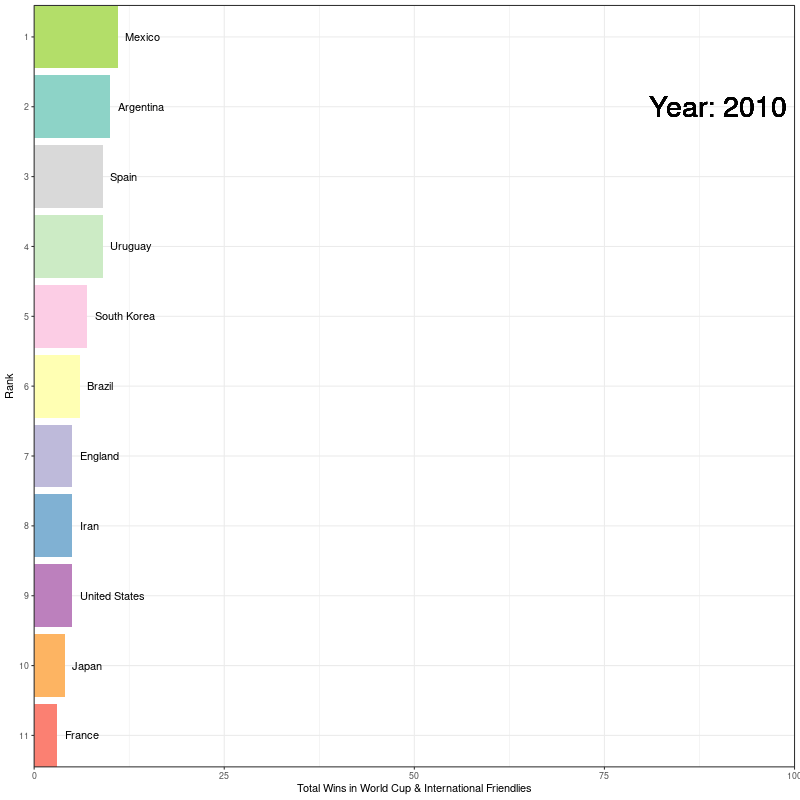

In [11]:
anim = animate(football_animation, height = 800, width =800, nframe = 72*8, fps = 20)
anim
anim_save("football_animation.gif", anim)
display_png(file= 'football_animation.gif')